In [523]:
def poly(a, b, c, start=1, maximum=500):
    # return x and y values for every x in a range
    xs = []
    ys = []
    for i in range(start, maximum):
        #ax2+bx+c , where a, b and c are constant
        y = (a*i)**2 - (b*i) + c
        xs.append(i)
        ys.append(y)
    return [xs, ys]
x, y = poly(2, 2, 1)

X_tr, X_te, y_tr, y_te = train_test_split(x, y, test_size=0.10, random_state=17)

In [381]:
lr2 = LinearRegression()

# fit the model to the training data
lr2.fit(np.array(X_tr).reshape(-1, 1), np.array(y_tr))

# make label predictions
results2 = lr2.predict(np.array(X_te).reshape(-1, 1))

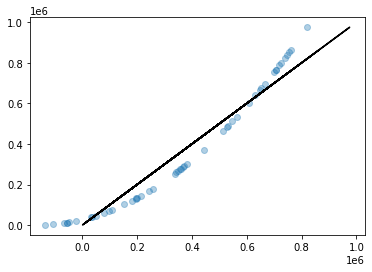

In [387]:
results2[0], y_te[0]

#plt.ylim(1895, 1935)
#plt.xlim(1906, 1925)
#sns.scatterplot(x=results_df['actual'], y=results_df['predicted'], alpha=0.2)
plt.scatter(results2, y_te, alpha=.35)
plt.plot(y_te, y_te, color='black')
plt.show()

In [474]:
def time_to_payoff(monthly_payment, interest_rate, balance=100000):
    months = 0
    while balance > 0:
        monthly_interest = (balance * interest_rate) / 12
        balance = balance + monthly_interest - monthly_payment
        months += 1
    return months

xs = []
ys = []
for x in range(550, 1201): 
    y = time_to_payoff(x, 0.05, balance=100000) 
    xs.append(x)
    ys.append(y)
len(xs), len(ys)

(651, 651)

In [475]:
print(xs[0], xs[25], xs[50], xs[75], xs[100], xs[-1])
print(ys[0], ys[25], ys[50], ys[75], ys[100], ys[-1])

550 575 600 625 650 1200
341 311 286 265 247 103


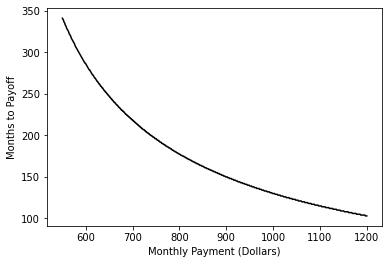

In [482]:
#plt.scatter(results2, y_te, alpha=.35)
plt.plot(xs, ys, color='black')
plt.ylabel('Months to Payoff')
plt.xlabel('Monthly Payment (Dollars)')
#plt.show()
plt.savefig('loan_payoff.png')

In [483]:
X_tr, X_te, y_tr, y_te = train_test_split(xs, ys, test_size=0.10, random_state=33)
lr2 = LinearRegression()

# fit the model to the training data
lr2.fit(np.array(X_tr).reshape(-1, 1), np.array(y_tr))

# make label predictions
results2 = lr2.predict(np.array(X_te).reshape(-1, 1))
len(results2)

66

In [484]:
lr2.coef_

array([-0.30988435])

In [485]:
lr2.intercept_

445.8523956769465

In [486]:
p = (lr2.coef_ * X_te[0])+lr2.intercept_
X_te[0], p[0], y_te[0]

(1019, 130.08024026686394, 127)

In [487]:
(lr2.coef_ * 1435.94)+lr2.intercept_

array([0.87705825])

In [488]:
time_to_payoff(1435.94, 0.05, balance=100000)

83

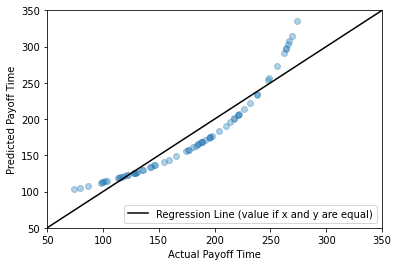

In [492]:
plt.ylim(50, 350)
plt.xlim(50, 350)
plt.scatter(results2, y_te, alpha=.35)
plt.plot([50, 350], [50, 350], color='black', label="Regression Line (value if x and y are equal)")
plt.ylabel('Predicted Payoff Time')
plt.xlabel('Actual Payoff Time')
plt.legend()
#plt.show()
plt.savefig('loan_predictions.png')